In [11]:

import cv2
import numpy as np
  
# Open the image files.
img1_color = cv2.imread("1.jpg")  # Image to be aligned.
img2_color = cv2.imread("2.jpg")    # Reference image.
  
# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape
print(img1.shape)
print(img2.shape)
  
# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)
  
# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
#  (which is not reqiured in this case).
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
# Match features between the two images.
# We create a Brute Force matcher with 
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
# Match the two sets of descriptors.
matches = matcher.match(d1, d2)
  
# Sort matches on the basis of their Hamming distance.
matches.sort(key = lambda x: x.distance)
  
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*90)]
no_of_matches = len(matches)
  
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
  
for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt
  
# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(img1_color,
                    homography, (width, height))
  
# Save the output.
cv2.imwrite('output.jpg', transformed_img)

(4032, 3024)
(4032, 3024)


True

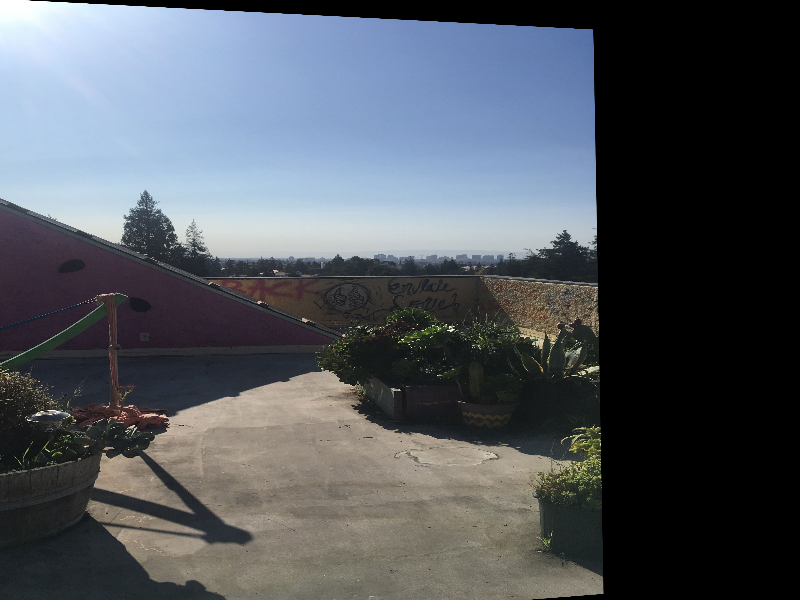

In [12]:
transformed_img = cv2.resize(transformed_img, (800,600))
cv2.imshow("x",transformed_img)

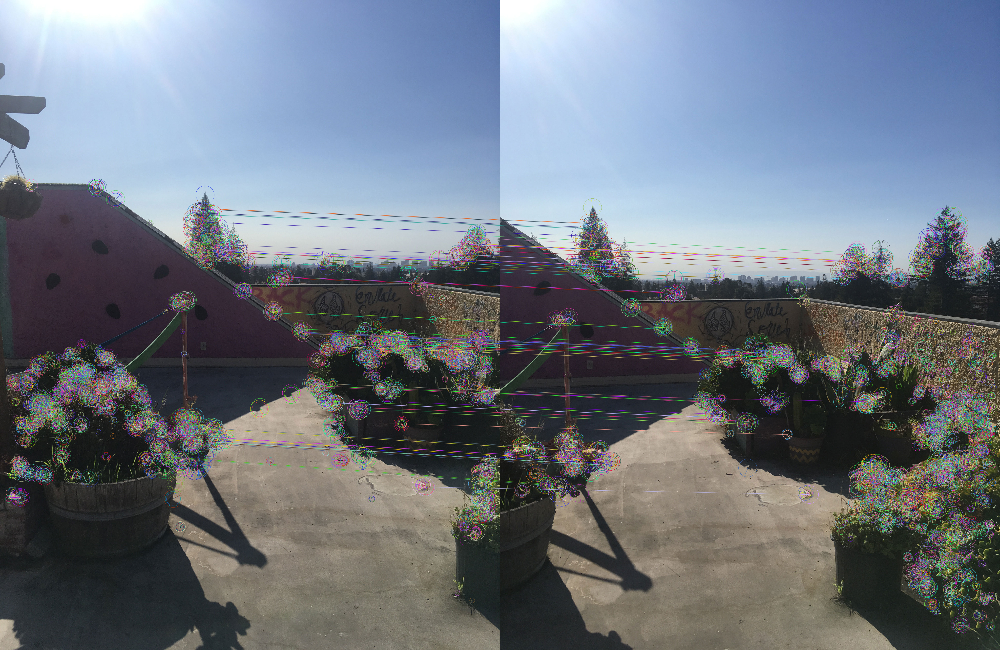

In [16]:
final_img = cv2.drawMatches(img1_color, kp1, img2_color, kp2, matches[:100], None, flags=4 )
   
final_img = cv2.resize(final_img, (1000,650))
  
# Show the final image
cv2.imshow("fi",final_img)